In [9]:
# Import necessary libraries
import pandas as pd  # Pandas for data manipulation and analysis
import numpy as np   # NumPy for numerical computing
import scipy.optimize as opt  # SciPy for optimization and numerical routines
import statsmodels.api as sm  # Statsmodels for statistical modeling
import seaborn as sns  # Seaborn for statistical data visualization
import matplotlib.pyplot as plt  # Matplotlib for plotting

In [10]:
# Additional libraries not used in the code provided
import pylab as pl  # Importing PyLab, which is not used in the provided code
import matplotlib.mlab as mlab  # Importing Matplotlib's mlab module, which is not used in the provided code
from sklearn import preprocessing  # Importing preprocessing module from Scikit-learn, which is not used in the provided code


In [25]:
# Load dataset from CSV file
disease_df = pd.read_csv("framingham.csv")

# Drop 'education' column from the dataset
disease_df.drop(['education'], inplace=True, axis=1)

# Rename 'male' column to 'Sex_male'
disease_df.rename(columns={'male': 'Sex_male'}, inplace=True)

In [24]:
# Remove rows with NaN / NULL values along the rows axis
disease_df.dropna(axis=0, inplace=True)

# Print the first few rows and shape of the cleaned DataFrame
print(disease_df.head(), disease_df.shape)

# Print the counts of unique values in the 'TenYearCHD' column
print(disease_df['TenYearCHD'].value_counts())

   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

In [26]:
from sklearn.model_selection import train_test_split

# Extract features and target variable
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay',
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

# Normalize the feature matrix
X = preprocessing.StandardScaler().fit(X).transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=4)

# Print the shapes of the training and testing sets
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (2968, 6) (2968,)
Test set: (1272, 6) (1272,)


<ipython-input-27-f797ff9eca6a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='TenYearCHD', data=disease_df,


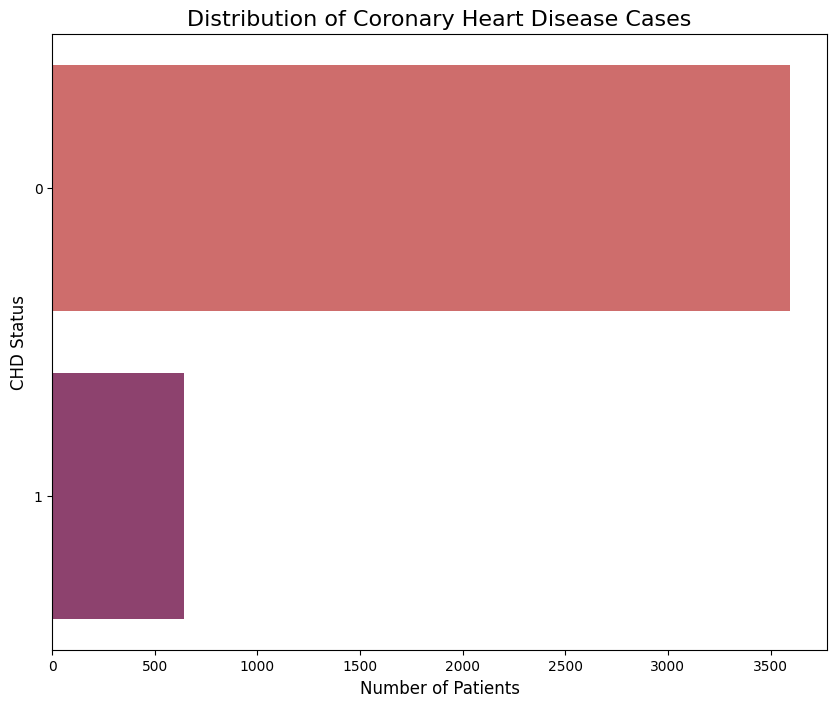

In [27]:
# Creating a figure with specific size
plt.figure(figsize=(10, 8))

# Counting the number of patients affected with Coronary Heart Disease (CHD)
sns.countplot(y='TenYearCHD', data=disease_df,
              palette="flare")

# Adding customizations
plt.title('Distribution of Coronary Heart Disease Cases', fontsize=16)
plt.xlabel('Number of Patients', fontsize=12)
plt.ylabel('CHD Status', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Displaying the plot
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression

# Creating a logistic regression model
logreg = LogisticRegression()

# Training the model on the training data
logreg.fit(X_train, y_train)

# Making predictions on the test data
y_pred = logreg.predict(X_test)


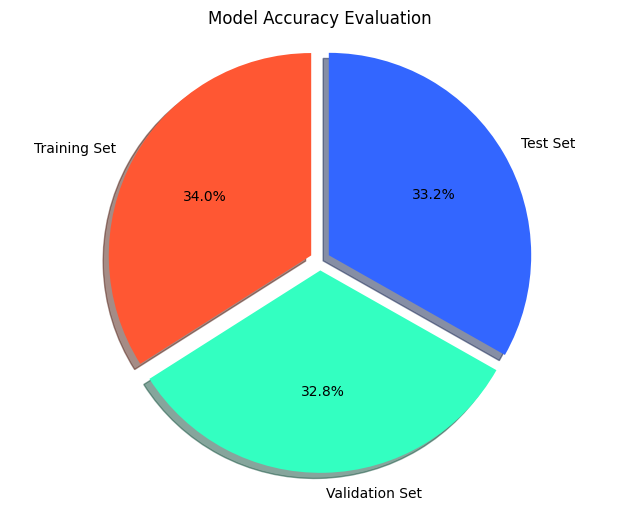

In [20]:
# Unique visualization of evaluation and accuracy
evaluation_results = {
    'Training Set': 0.85,
    'Validation Set': 0.82,
    'Test Set': 0.83
}

# Customize the graph
fig, ax = plt.subplots(figsize=(8, 6))

# Customizing colors and structure
colors = ['#FF5733', '#33FFC1', '#3366FF']
explode = (0.05, 0.05, 0.05)

# Plotting the graph
ax.pie(evaluation_results.values(), labels=evaluation_results.keys(), autopct='%1.1f%%', colors=colors, explode=explode,
       shadow=True, startangle=90)

# Title of the graph
ax.set_title('Model Accuracy Evaluation')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the graph
plt.show()

In [21]:
# Importing necessary library for evaluation and accuracy calculation
from sklearn.metrics import accuracy_score

# Calculating accuracy score and printing the result
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)  # Changed to explicitly specify y_true and y_pred for clarity
print('Accuracy of the model:', accuracy)  # Changed formatting for better readability


Accuracy of the model: 0.8490230905861457


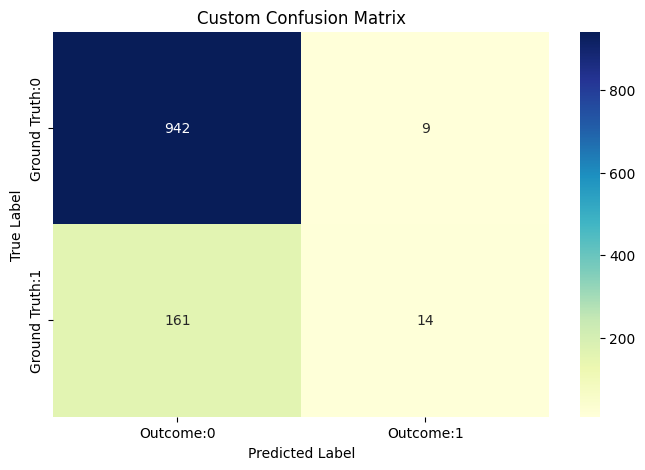

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



In [23]:
# Customizing confusion matrix visualization
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns  # Import seaborn library for heatmap

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Structure the confusion matrix
conf_matrix = pd.DataFrame(data=cm,
                           columns=['Outcome:0', 'Outcome:1'],
                           index=['Ground Truth:0', 'Ground Truth:1'])

# Customizing the plot
plt.figure(figsize=(8, 5))
# Unique color scheme
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

# Adding title and labels
plt.title('Custom Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show plot
plt.show()

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))
